In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling and handling missing values
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Clustering Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import os
import warnings
warnings.filterwarnings("ignore")

from data_loader import *
from exploratory_data_analysis import *

## Import DLR Onleveled Data

In [2]:
# Get the current working directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

# Construct the path to the file in the parent directory
onlevel_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
print(f"Onlevel Directory: {onlevel_dir}")

Current Directory: c:\Users\RaymondGreenfield\OneDrive - endurancedirect.com\Documents\Actuarial_Work\Onlevel\202406\Onlevel.2024.06
Onlevel Directory: c:\Users\RaymondGreenfield\OneDrive - endurancedirect.com\Documents\Actuarial_Work\Onlevel\202406


In [3]:
data_file = "202406"
file_date = "2024.06"

DLR_directory = f"Onlevel.{file_date}\DLR"
DTC_directory = f"Onlevel.{file_date}\DTC"

In [4]:
file_name_APEX = f"APEX.{file_date}.Onleveled.csv"
path_to_APEX = os.path.join(onlevel_dir, DLR_directory, file_name_APEX)

path_to_APEX

'c:\\Users\\RaymondGreenfield\\OneDrive - endurancedirect.com\\Documents\\Actuarial_Work\\Onlevel\\202406\\Onlevel.2024.06\\DLR\\APEX.2024.06.Onleveled.csv'

In [5]:
df = pd.read_csv(path_to_APEX, delimiter=",")

In [6]:
# For APEX we have 'Class' not 'Vehicle_Class'
if 'Class' in df.columns:
    df.rename(columns={'Class': 'Vehicle_Class'}, inplace=True)

In [7]:
df.shape

(252908, 38)

In [8]:
df.head()

,Reinsurer,Agent_Name,Coverage_Group,Coverage_Type_desc,Contract_Number,Term Months,Term Miles,Vehicle Age,Vehicle_Class,Sale_Odometer,...,Contract_Count,Paid_Claim_Count,Coverage Subgroup,Retained or Reinsured,Coverage Name,Onlevel Surcharge,Dealer Surcharge,Onlvl Reserve Retained,Onlvl Reserve Reinsured,Onleveled Claim Reserve
0,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600127810,24,25000,4,2,127858,...,1,NaN,APEX,Reinsured,Premier,0.0,0.0,468.0,550.0,468.0
1,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600129756,24,25000,4,3,126624,...,1,NaN,APEX,Reinsured,Premier,0.0,0.0,641.0,753.0,641.0
2,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600129928,24,25000,7,3,125212,...,1,NaN,APEX,Reinsured,Premier,0.0,0.0,689.0,810.0,689.0
3,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600131068FL,48,50000,4,4,50554,...,1,1.0,APEX,Reinsured,Premier,0.0,0.0,905.0,1063.0,905.0
4,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600134282FL,48,50000,6,3,70435,...,1,1.0,APEX,Reinsured,Premier,0.0,0.0,999.0,1174.0,999.0


In [9]:
df.columns

Index(['Reinsurer', 'Agent_Name', 'Coverage_Group', 'Coverage_Type_desc',
       'Contract_Number', 'Term Months', 'Term Miles', 'Vehicle Age',
       'Vehicle_Class', 'Sale_Odometer', 'Deductible', 'Deductible Type',
       'Effective_Date', 'Product_type_desc', 'Make', 'Dealer_Name',
       'Dealer_Number', 'Model', 'Dealer_State', 'Dealer_Status', 'Sale_Date',
       'Claim_Reserve', 'Paid_Claim_Amount', 'Paid_Claim_Trended_by_EY',
       'Total_Paid_Trended_by_PaymentDate', 'Surcharge_Reserve',
       'Base_Reserve', 'AMT22_Earned_Reserve', 'Contract_Count',
       'Paid_Claim_Count', 'Coverage Subgroup', 'Retained or Reinsured',
       'Coverage Name', 'Onlevel Surcharge', 'Dealer Surcharge',
       'Onlvl Reserve Retained', 'Onlvl Reserve Reinsured',
       'Onleveled Claim Reserve'],
      dtype='object')

## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252908 entries, 0 to 252907
Data columns (total 38 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Reinsurer                          252908 non-null  object 
 1   Agent_Name                         252908 non-null  object 
 2   Coverage_Group                     252908 non-null  object 
 3   Coverage_Type_desc                 252908 non-null  object 
 4   Contract_Number                    252908 non-null  object 
 5   Term Months                        252908 non-null  int64  
 6   Term Miles                         252908 non-null  int64  
 7   Vehicle Age                        252908 non-null  int64  
 8   Vehicle_Class                      252908 non-null  int64  
 9   Sale_Odometer                      252908 non-null  int64  
 10  Deductible                         252908 non-null  int64  
 11  Deductible Type                    2529

## Data Processing for Modeling

In [ ]:
# Columns defined for the clustering analysis
cols_analysis = ["Make", "Model_Category1", "Vehicle_Class",
                 #"Onleveled_Earned_Reserve", "Total_Paid_Trended_by_PaymentDate",
                 "Onlvl_Trended_Paid_Loss_Ratio",
                 ]

df = add_Onlvl_Trended_Paid_LR(df) # Add the "Onlvl_Trended_Paid_Loss_Ratio"
df = add_LR_column(df)             # Add the "Onlevel_Paid_Loss_Ratio"


In [12]:
# Will need to fill the "Onlevel_Paid_Loss_Ratio" with 0 for values where Paid_Claim_Amount == 0
df.head()

,Reinsurer,Agent_Name,Coverage_Group,Coverage_Type_desc,Contract_Number,Term Months,Term Miles,Vehicle Age,Vehicle_Class,Sale_Odometer,...,Retained or Reinsured,Coverage Name,Onlevel Surcharge,Dealer Surcharge,Onlvl Reserve Retained,Onlvl Reserve Reinsured,Onleveled Claim Reserve,Onleveled_Earned_Reserve,Onlvl_Trended_Paid_Loss_Ratio,Onlevel_Paid_Loss_Ratio
0,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600127810,24,25000,4,2,127858,...,Reinsured,Premier,0.0,0.0,468.0,550.0,468.0,468.000000,NaN,NaN
1,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600129756,24,25000,4,3,126624,...,Reinsured,Premier,0.0,0.0,641.0,753.0,641.0,641.000000,NaN,NaN
2,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600129928,24,25000,7,3,125212,...,Reinsured,Premier,0.0,0.0,689.0,810.0,689.0,689.000000,NaN,NaN
3,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600131068FL,48,50000,4,4,50554,...,Reinsured,Premier,0.0,0.0,905.0,1063.0,905.0,474.684033,1.196748,0.772366
4,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600134282FL,48,50000,6,3,70435,...,Reinsured,Premier,0.0,0.0,999.0,1174.0,999.0,999.000000,0.553709,0.386476


In the data_loader.py file I have a function that adds the Model_Category1.

In [13]:
df['Model_Category1'] = df['Model'].apply(map_model_category)

# Adding the vehicle_class to the Category1 Bucket
#df['Model_Category1'] = df.apply(lambda row: map_model_category_vehicle_class(row['Model'], row['Vehicle_Class']), axis=1)

In [ ]:
num_cols = ["Term Months", "Term Miles", "Vehicle Age", "Sale_Odometer", 
            #"Retained or Reinsured", 
            "Make", "Model_Category1",
            "Paid_Claim_Amount", "Onleveled Claim Reserve", 
            #"Total_Paid_Trended_by_PaymentDate", "Onleveled_Earned_Reserve",
            "Onlvl_Trended_Paid_Loss_Ratio",
            ]

# Use Label Encoding for categorical columns (Make and Vehicle_Class)
le_make = LabelEncoder()
le_model = LabelEncoder()

df["Make"] = le_make.fit_transform(df["Make"])
df["Model_Category1"] = le_model.fit_transform(df["Model_Category1"])

#make_map = dict(zip(le_make.classes_, le_make.transform(le_make.classes_)))
#model_map = dict(zip(le_model.classes_, le_model.transform(le_model.classes_)))

#print(make_map)
#print(model_map)

# Check for NaN, Infinity, or large values and replace them with 0 (or another suitable value)
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], 0)

# Create an imputer to fill missing values with 0 (we can choose the mean if necessary) or drop the columns
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Apply the imputer to the columns used for clustering
df[num_cols] = imputer.fit_transform(df[num_cols])

In [15]:
# Check the transformation mapping and if the Claim_Reserve was filled with 0
df.head()

,Reinsurer,Agent_Name,Coverage_Group,Coverage_Type_desc,Contract_Number,Term Months,Term Miles,Vehicle Age,Vehicle_Class,Sale_Odometer,...,Coverage Name,Onlevel Surcharge,Dealer Surcharge,Onlvl Reserve Retained,Onlvl Reserve Reinsured,Onleveled Claim Reserve,Onleveled_Earned_Reserve,Onlvl_Trended_Paid_Loss_Ratio,Onlevel_Paid_Loss_Ratio,Model_Category1
0,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600127810,24.0,25000.0,4.0,2,127858.0,...,Premier,0.0,0.0,468.0,550.0,468.0,468.000000,0.000000,NaN,227.0
1,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600129756,24.0,25000.0,4.0,3,126624.0,...,Premier,0.0,0.0,641.0,753.0,641.0,641.000000,0.000000,NaN,321.0
2,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600129928,24.0,25000.0,7.0,3,125212.0,...,Premier,0.0,0.0,689.0,810.0,689.0,689.000000,0.000000,NaN,233.0
3,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600131068FL,48.0,50000.0,4.0,4,50554.0,...,Premier,0.0,0.0,905.0,1063.0,905.0,474.684033,1.196748,0.772366,531.0
4,CARLOTZ,CarLotz Inc.,APEX,APEX PREMIER/TRP/4000,APM1600134282FL,48.0,50000.0,6.0,3,70435.0,...,Premier,0.0,0.0,999.0,1174.0,999.0,999.000000,0.553709,0.386476,301.0


Filter the dataset to FL and All other States for Comparison
- Should I also account for States that are terminated?

In [16]:
# Filter for FL state only
df_FL = df[df["Dealer_State"] == "FL"] 
df_not_FL = df[df["Dealer_State"] != "FL"]

## Apply K-means Clustering 
- Inertia is the Within-Cluster Variation
- Silhouette Score

        Interpretation
        Close to +1: Points are well-separated from neighboring clusters and appropriately clustered.
        Close to 0: Points are on the decision boundary, and the clusters might overlap.
        Negative: Points are likely in the wrong cluster

Kmeans-clustering All the States

In [17]:
X_high_dim = df[num_cols]
y = df["Vehicle_Class"]

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X_high_dim)

KMeans(n_clusters=6, random_state=0)

In [18]:
kmeans.cluster_centers_

array([[1.06874662e+02, 9.18248991e+04, 2.23656476e+00, 2.33738808e+04,
        1.83409546e+01, 3.47469239e+02, 2.89180706e+02, 5.66232081e+02,
        3.68616490e+02, 2.70607436e+02, 6.94911474e-01],
       [7.70280650e+01, 9.99999000e+05, 7.80075496e-01, 1.03608506e+04,
        1.78503200e+01, 3.74857541e+02, 4.26687822e+01, 6.61884018e+02,
        4.47295323e+01, 6.08979215e+01, 2.75067853e-01],
       [3.60612925e+01, 3.25024689e+04, 7.31393538e+00, 1.10589732e+05,
        1.77675394e+01, 3.47277763e+02, 5.75053744e+02, 7.44457639e+02,
        7.73434704e+02, 5.55117378e+02, 1.13550460e+00],
       [5.64100449e+01, 3.98977531e+04, 4.68391929e+00, 5.32468841e+04,
        1.79021588e+01, 3.30637748e+02, 3.75709870e+02, 6.57680425e+02,
        5.34640996e+02, 4.84813516e+02, 7.03619874e-01],
       [1.34779419e+02, 1.34020592e+05, 1.35104779e+00, 1.44479947e+04,
        1.91242265e+01, 3.65086163e+02, 3.67262786e+02, 4.39258041e+02,
        4.50318678e+02, 1.47265314e+02, 4.53220089e-

In [19]:
kmeans.inertia_

120777989653103.11

In [20]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")

Result: 32875 out of 252908 samples were correctly labeled.


In [21]:
acc_score = correct_labels/float(y.size)

print(f'Accuracy score: {acc_score}')

Accuracy score: 0.12998797981874832


In [22]:
# Printing the silhoutte_score
silhouette_score(X_high_dim, kmeans.labels_)

0.3975695117502745

Kmeans-clustering Only FL

In [23]:
X_high_dim = df_FL[num_cols]
y = df_FL["Vehicle_Class"]

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X_high_dim)

KMeans(n_clusters=6, random_state=0)

In [24]:
kmeans.cluster_centers_

array([[4.13154059e+01, 3.43905504e+04, 5.29957276e+00, 6.96236311e+04,
        1.71824579e+01, 3.41989445e+02, 5.29310789e+02, 6.69200038e+02,
        7.30854973e+02, 4.46576109e+02, 8.16665873e-01],
       [7.48902439e+01, 9.99999000e+05, 9.02439024e-01, 1.06000091e+04,
        1.44146341e+01, 3.97085366e+02, 1.01582348e+02, 9.01199970e+02,
        1.06529327e+02, 7.85504084e+01, 1.99251997e-01],
       [7.36315087e+01, 7.54717401e+04, 4.65287049e+00, 6.58323921e+04,
        1.93662661e+01, 3.74243436e+02, 8.19631629e+02, 1.28366267e+03,
        9.97872512e+02, 5.71171624e+02, 1.47518759e+00],
       [6.12710740e+01, 5.24335217e+04, 3.35807324e+00, 3.55524559e+04,
        1.77254854e+01, 3.35602114e+02, 3.72760231e+02, 6.31550172e+02,
        4.98462784e+02, 3.51474233e+02, 7.60695811e-01],
       [3.31901811e+01, 3.33188751e+04, 7.18255481e+00, 1.13359613e+05,
        1.77030505e+01, 3.63145853e+02, 6.94444271e+02, 7.45294204e+02,
        9.09681188e+02, 4.65055383e+02, 1.19987830e+

In [25]:
kmeans.inertia_

5958636551628.975

In [26]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")

Result: 2396 out of 15594 samples were correctly labeled.


In [27]:
acc_score = correct_labels/float(y.size)

print(f'Accuracy score: {acc_score}')

Accuracy score: 0.15364883929716558


In [28]:
# Printing the silhoutte_score
silhouette_score(X_high_dim, kmeans.labels_)

0.3940700689615508

Kmeans-clustering All but FL

In [29]:
X_high_dim = df_not_FL[num_cols]
y = df_not_FL["Vehicle_Class"]

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X_high_dim)

KMeans(n_clusters=6, random_state=0)

In [30]:
kmeans.cluster_centers_

array([[5.50303272e+01, 3.81127724e+04, 5.98618560e+00, 7.98643026e+04,
        1.79213563e+01, 3.38901466e+02, 5.30910525e+02, 8.07760589e+02,
        7.34571821e+02, 6.03963994e+02, 9.29163881e-01],
       [7.71496964e+01, 9.99999000e+05, 7.73113617e-01, 1.03472437e+04,
        1.80457936e+01, 3.73592888e+02, 3.93168916e+01, 6.48268123e+02,
        4.12134295e+01, 5.98935823e+01, 2.79381400e-01],
       [1.22820572e+02, 1.09418175e+05, 1.51481744e+00, 1.57292756e+04,
        1.84726914e+01, 3.56559287e+02, 2.74014810e+02, 4.54116923e+02,
        3.44961485e+02, 1.99933020e+02, 5.15356478e-01],
       [7.57904331e+01, 5.63959476e+04, 3.69062957e+00, 3.62694865e+04,
        1.80893412e+01, 3.29109878e+02, 3.11687759e+02, 6.31141430e+02,
        4.26427763e+02, 3.92417969e+02, 6.74362469e-01],
       [2.96596340e+01, 3.18073773e+04, 7.81113371e+00, 1.22610154e+05,
        1.79608258e+01, 3.49736937e+02, 5.81256198e+02, 7.21130746e+02,
        7.71271720e+02, 5.36147630e+02, 1.19997887e+

In [31]:
kmeans.inertia_

110644284396759.66

In [32]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print(f"Result: {correct_labels} out of {y.size} samples were correctly labeled.")

Result: 29695 out of 237314 samples were correctly labeled.


In [33]:
acc_score = correct_labels/float(y.size)

print(f'Accuracy score: {acc_score}')

Accuracy score: 0.12512957516202164


In [34]:
# Printing the silhoutte_score
silhouette_score(X_high_dim, kmeans.labels_)

KeyboardInterrupt: 

## Elbow Curve
- Used to find the Optimal number of clusters
- We will look that the Elbow curve for All, FL only, and All but FL

Elbow Plot All States

In [ ]:
# 57 mins
X_high_dim = df[num_cols]
y = df["Vehicle_Class"]

inertia = []
silhouette_scores = []

cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_high_dim)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score for each cluster count
    silhouette_scores.append(silhouette_score(X_high_dim, kmeans.labels_))


KeyboardInterrupt: 

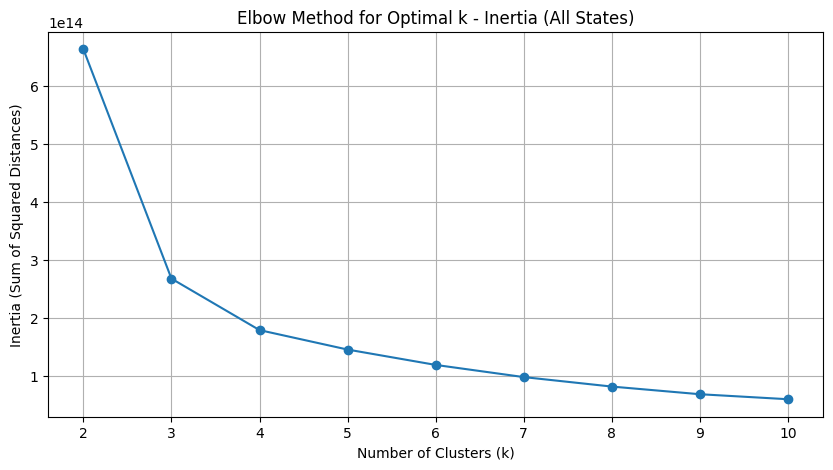

In [ ]:
# Plot the inertia (elbow method)
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title(f'Elbow Method for Optimal k - Inertia (All States)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

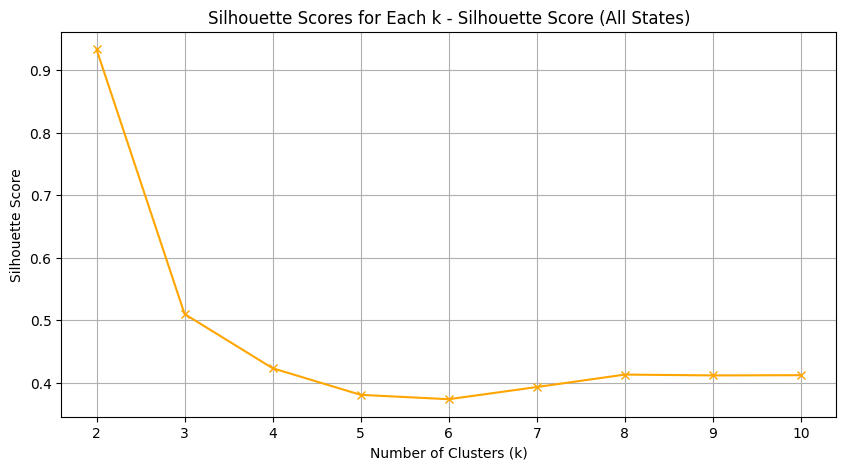

In [ ]:
# Plot silhouette score for each k
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='x', color='orange')
plt.title(f'Silhouette Scores for Each k - Silhouette Score (All States)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Elbow plot for FL

In [ ]:
# 30 Seconds

X_high_dim = df_FL[num_cols]
y = df_FL["Vehicle_Class"]

inertia = []
silhouette_scores = []

cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_high_dim)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score for each cluster count
    silhouette_scores.append(silhouette_score(X_high_dim, kmeans.labels_))


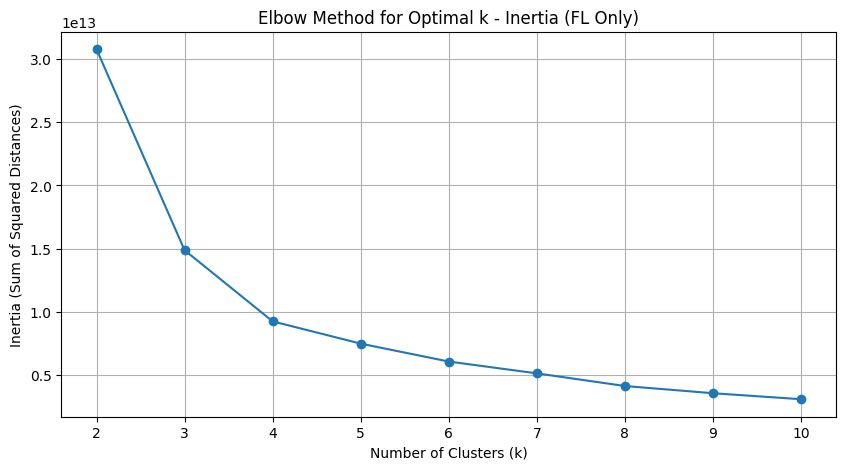

In [ ]:
# Plot the inertia (elbow method)
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title(f'Elbow Method for Optimal k - Inertia (FL Only)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

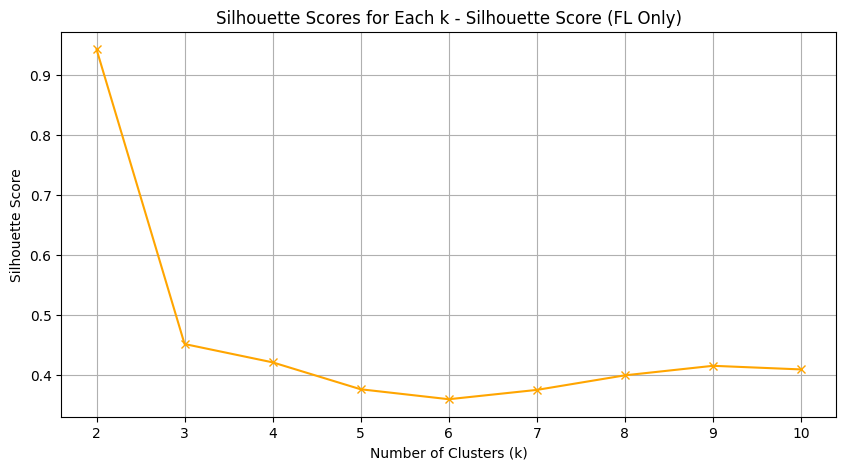

In [ ]:
# Plot silhouette score for each k
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='x', color='orange')
plt.title(f'Silhouette Scores for Each k - Silhouette Score (FL Only)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Elbow Method (All but FL)

In [ ]:
X_high_dim = df_not_FL[num_cols]
y = df_not_FL["Vehicle_Class"]

inertia = []
silhouette_scores = []

cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_high_dim)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score for each cluster count
    silhouette_scores.append(silhouette_score(X_high_dim, kmeans.labels_))


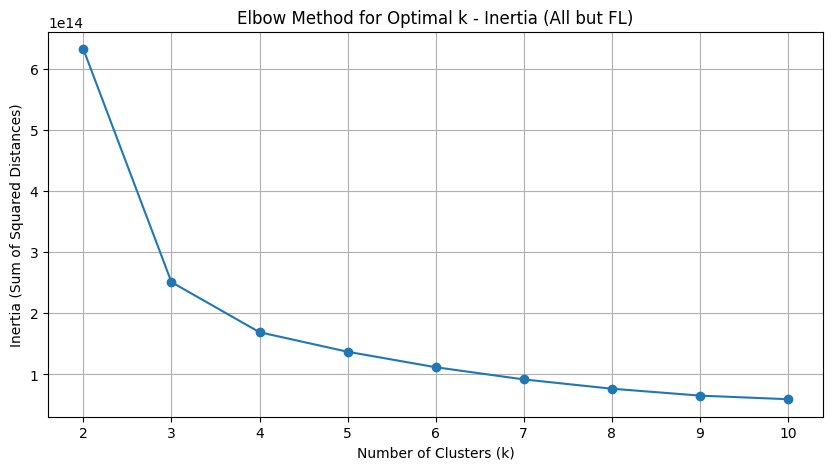

In [ ]:
# Plot the inertia (elbow method)
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title(f'Elbow Method for Optimal k - Inertia (All but FL)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

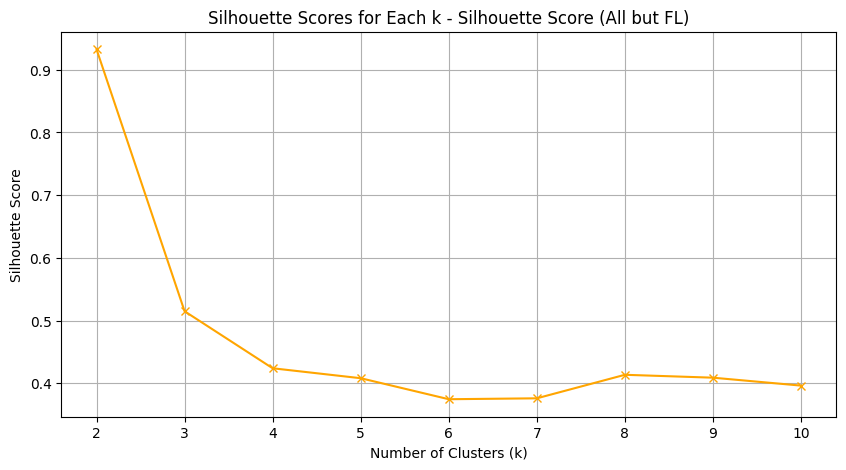

In [ ]:
# Plot silhouette score for each k
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='x', color='orange')
plt.title(f'Silhouette Scores for Each k - Silhouette Score (All but FL)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Example Data
data = {
    'age': [25, 45, 35, 50, 23, 60, 37, 40, 30, 27],
    'vehicle_age': [5, 15, 10, 20, 4, 25, 12, 8, 7, 6],
    'num_policies': [1, 3, 2, 4, 1, 5, 2, 2, 1, 1],
    'claims': [200, 1500, 800, 2200, 100, 2500, 900, 1000, 600, 300],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and Target
X = df[['age', 'vehicle_age', 'num_policies']]
y = df['claims']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tweedie Regressor (Scikit-Learn)
model = TweedieRegressor(power=1.5, alpha=0.5, link='log')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

# Coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Evaluate predictions vs actuals
print("Predicted:", y_pred)
print("Actual:", y_test.values)


R² Score: 0.8571453280349045
Mean Squared Error: 28928.071072931845
Model Coefficients: [ 0.11581625  0.03405614 -0.54414031]
Model Intercept: 3.0625721252475335
Predicted: [ 508.42229809 1277.58222495]
Actual: [ 600 1500]


In [ ]:
# Add a constant for intercept
X_train_sm = sm.add_constant(X_train)

# Fit a GLM (Generalized Linear Model) with Tweedie family
glm_model = sm.GLM(y_train, X_train_sm, family=sm.families.Tweedie(var_power=1.5, link=sm.families.links.log()))
glm_results = glm_model.fit()

# Summary of the model
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 claims   No. Observations:                    8
Model:                            GLM   Df Residuals:                        4
Model Family:                 Tweedie   Df Model:                            3
Link Function:                    log   Scale:                          5.0057
Method:                          IRLS   Log-Likelihood:                -54.566
Date:                Thu, 21 Nov 2024   Deviance:                       19.518
Time:                        10:02:44   Pearson chi2:                     20.0
No. Iterations:                    12   Pseudo R-squ. (CS):             0.9883
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6173      1.349      1.939   